In [9]:
## Importing libraries and dependencies
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [10]:
# This sheet is presented on the CEJST site as '1.0-communities.csv'

df = pd.read_csv('cejst.csv')
df = df[df['State/Territory'] == "Georgia"]
df['Percent Nonwhite'] = 1- df['Percent White']

/var/folders/rb/wdj9db193s70npfrcghpqt340000gn/T/ipykernel_4098/57012420.py:3: DtypeWarning: Columns (18,26,70,72,85,131) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cejst.csv')


<Axes: xlabel='Total threshold criteria exceeded', ylabel='Percent Nonwhite'>

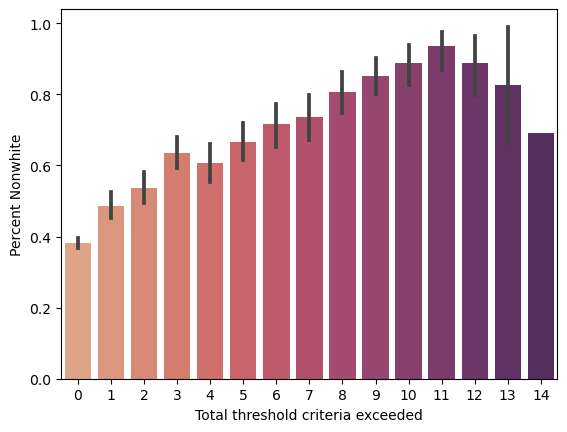

In [11]:
sns.barplot(df, 
        x='Total threshold criteria exceeded',
        y = 'Percent Nonwhite', palette = 'flare')

In [12]:
## Making summary df of some demographic info

disadvantaged = df[df['Identified as disadvantaged'] == True]
not_disadvantaged = df[df['Identified as disadvantaged'] == False]

nonwhitepops = [np.round(disadvantaged['Percent Nonwhite'].mean(), 3) * 100, 
            np.round(not_disadvantaged['Percent Nonwhite'].mean(), 3) * 100]
whitepops = [np.round(disadvantaged['Percent White'].mean(), 3) * 100, 
             np.round(not_disadvantaged['Percent White'].mean(), 3) * 100]
pops = np.array([nonwhitepops, whitepops])
#pops = pops.transpose()
pop_df = pd.DataFrame({'Percent Nonwhite': pops[0], 'White': pops[1]})
pop_df.index = ['Disadvantaged Tracts', 'Not Disadvantaged Tracts']
pop_df

,Percent Nonwhite,White
Disadvantaged Tracts,61.1,38.9
Not Disadvantaged Tracts,38.1,61.9


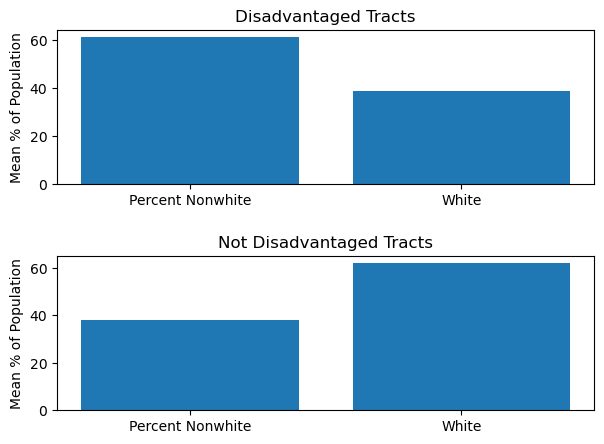

In [13]:
plt.subplot(211)
plt.bar(pop_df.columns, pop_df.loc['Disadvantaged Tracts',:])
plt.ylabel('Mean % of Population')
plt.title('Disadvantaged Tracts')

plt.subplot(212)
plt.bar(pop_df.columns, pop_df.loc['Not Disadvantaged Tracts',:])
plt.ylabel('Mean % of Population')
plt.title('Not Disadvantaged Tracts')

plt.tight_layout(pad = 2)
plt.show()

<Axes: xlabel='Total threshold criteria exceeded', ylabel='Percent Nonwhite'>

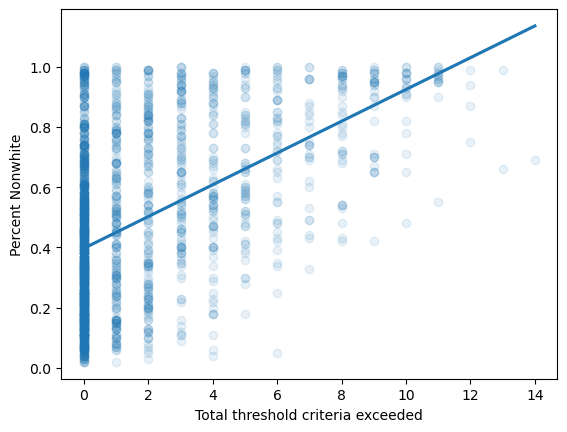

In [14]:
sns.regplot(df, 
        x='Total threshold criteria exceeded',
        y = 'Percent Nonwhite', ci = None, 
        scatter_kws={'alpha':0.1})

<Axes: xlabel='Total threshold criteria exceeded', ylabel='Count'>

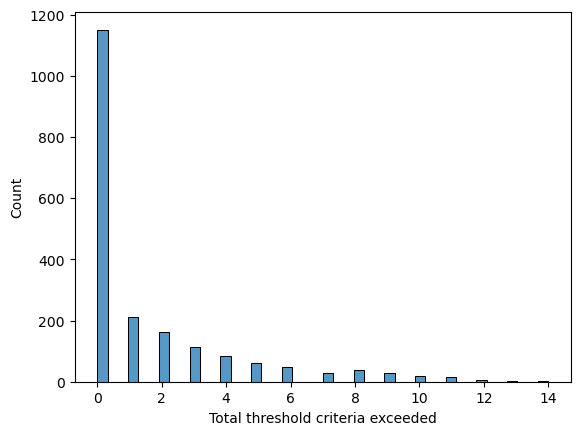

In [15]:
sns.histplot(data = df['Total threshold criteria exceeded'])

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


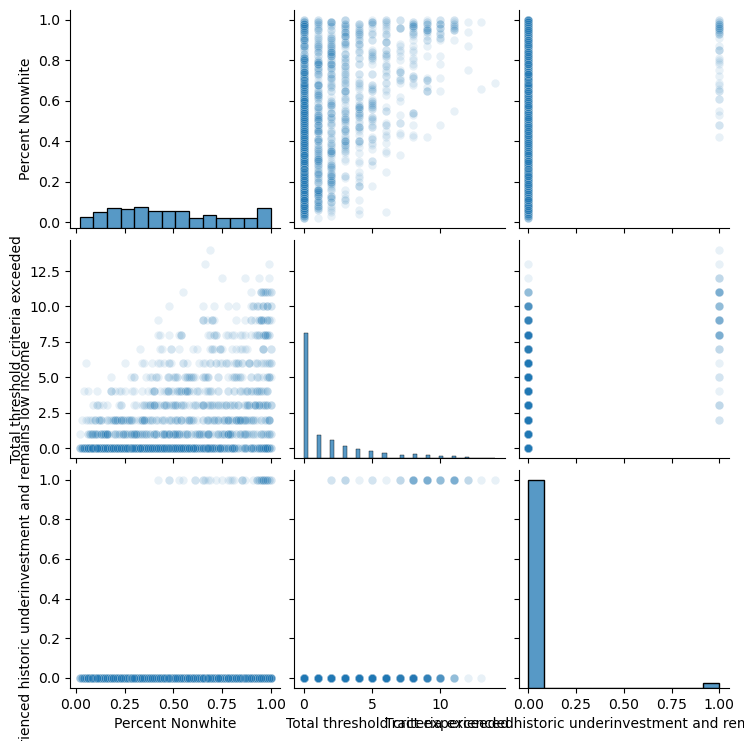

In [16]:
sns.pairplot(df,
             vars=['Percent Nonwhite','Total threshold criteria exceeded',
                   'Tract experienced historic underinvestment and remains low income'],
                   plot_kws={'alpha':0.1})
plt.show()

In [17]:
print('disadvantaged mean threshold exceeded :', disadvantaged['Total threshold criteria exceeded'].mean())
print('not disadvantaged threshold exceeded:', not_disadvantaged['Total threshold criteria exceeded'].mean())

disadvantaged mean threshold exceeded : 3.6265060240963853
not disadvantaged threshold exceeded: 0.0


In [20]:
## Making other summary dataframes regarding income. More to come from this.

low_income = df[df['Is low income?'] == True]
not_low_income = df[df['Is low income?'] == False]

print(low_income['Total threshold criteria exceeded'].mean())
print(not_low_income['Total threshold criteria exceeded'].mean())

3.20021645021645
0.05071770334928229
